# OpenCV

In [1]:
import cv2
cv2.__version__

'4.2.0'

In [2]:
image = cv2.imread('../image/irin.jpg')
image

array([[[225, 195, 238],
        [225, 195, 238],
        [226, 193, 237],
        ...,
        [232, 201, 246],
        [234, 201, 246],
        [233, 200, 245]],

       [[227, 197, 240],
        [225, 195, 238],
        [228, 195, 239],
        ...,
        [230, 199, 244],
        [233, 200, 245],
        [233, 200, 245]],

       [[226, 195, 240],
        [227, 196, 241],
        [226, 195, 240],
        ...,
        [231, 200, 245],
        [233, 200, 245],
        [233, 200, 245]],

       ...,

       [[  2,  10,  23],
        [  1,   9,  22],
        [ 11,  20,  30],
        ...,
        [246, 248, 248],
        [247, 250, 248],
        [246, 249, 247]],

       [[  5,  13,  26],
        [  3,  11,  24],
        [  6,  12,  25],
        ...,
        [245, 248, 246],
        [248, 249, 247],
        [249, 250, 248]],

       [[  7,  15,  28],
        [  5,  13,  26],
        [  6,   9,  23],
        ...,
        [244, 247, 245],
        [246, 247, 245],
        [248, 249, 247]]

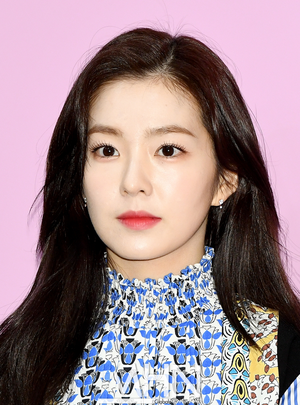

In [3]:
from PIL import Image
img = Image.open('../image/irin.jpg').resize((300,405),Image.ANTIALIAS)
img

cv2.imshow('irin',image); cv2.waitKey(0)

In [4]:
cv2.imwrite('../image/irin_image.jpg',image)

True

### BGR to Gray

In [5]:
imagel = cv2.cvtColor(image,cv2.COLOR_BGR2GRAY)
imagel

array([[211, 211, 210, ..., 218, 218, 217],
       [213, 211, 212, ..., 216, 217, 217],
       [212, 213, 212, ..., 217, 217, 217],
       ...,
       [ 13,  12,  22, ..., 248, 249, 248],
       [ 16,  14,  15, ..., 247, 248, 249],
       [ 18,  16,  13, ..., 246, 246, 248]], dtype=uint8)

In [6]:
cv2.imwrite('../image/irin_gray.jpg',imagel)

True

In [7]:
cv2.imshow('irin', imagel); cv2.waitKey(0)

-1

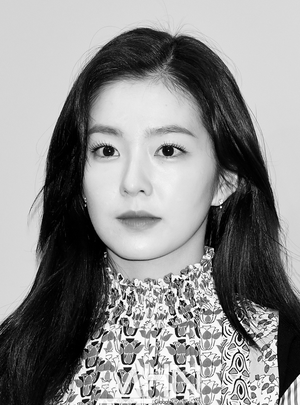

In [8]:
img_gray = Image.open('../image/irin_gray.jpg').resize((300,405),Image.ANTIALIAS)
img_gray

# Edge Detection

In [9]:
cv2.imwrite('../image/edges_flower.jpg',cv2.Canny(imagel,200,300))

True

In [10]:
cv2.imshow('irin_gray', cv2.imread('../image/edges_flower.jpg')); cv2.waitKey(0)

-1

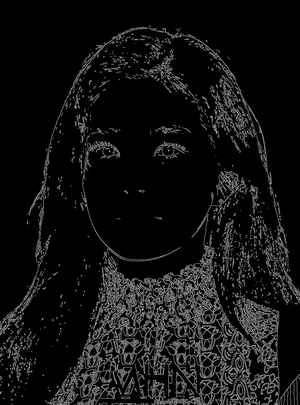

In [11]:
from PIL import Image
img_edge = Image.open('../image/edges_flower.jpg').resize((300,405),Image.ANTIALIAS)
img_edge

# Face Detection

In [12]:
face_detection = cv2.CascadeClassifier('../data/haarcascade_frontalface_default.xml')

In [13]:
img = cv2.imread('../image/irin.jpg')

In [14]:
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
faces = face_detection.detectMultiScale(gray, 1.3, 5)

In [15]:
for (x,y,w,h) in faces:
    img = cv2.rectangle(img, (x,y), (x+w, y+h), (255,0,0),3)
    print(f'x:\n{x}\ny:\n{y}\nw:{w}\nh:{h}')
cv2.imwrite('../image/irin_face.jpg',img)
cv2.imshow('',cv2.imread('../image/irin_face.jpg')); cv2.waitKey(0)

x:
165
y:
270
w:583
h:583


-1

In [16]:
print(f'x:\n{x}\ny:\n{y}\nw:{w}\nh:{h}')

x:
165
y:
270
w:583
h:583


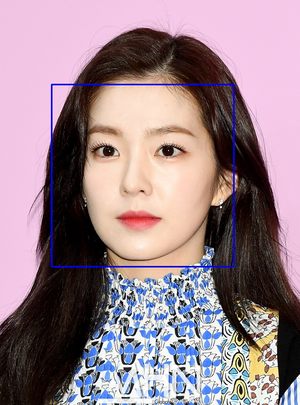

In [17]:
from PIL import Image
img_face_recog = Image.open('../image/irin_face.jpg').resize((300,405),Image.ANTIALIAS)
img_face_recog

# Eye Detection

In [18]:
eye_detection = cv2.CascadeClassifier('../data/haarcascade_eye.xml')

In [19]:
img = cv2.imread('../image/irin.jpg')
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
eyes = eye_detection.detectMultiScale(gray, 1.25,5)

# scaling factor를 조종해서 눈을 찾음, 값이 작으면 많이 찾고, 크면 찾지 못함

In [20]:
for (x,y,w,h) in eyes:
    img = cv2.rectangle(img, (x,y), (x+w, y+h), (0,255,0),1)
    print(f'x:\n{x}\ny:\n{y}\nw:{w}\nh:{h}')
cv2.imwrite('../image/irin_eye.jpg',img)    
cv2.imshow('',cv2.imread('../image/irin_eye.jpg')); cv2.waitKey(0)

x:
475
y:
422
w:120
h:120
x:
282
y:
425
w:114
h:114


-1

In [21]:
print(f'x:\n{x}\ny:\n{y}\nw:{w}\nh:{h}')

x:
282
y:
425
w:114
h:114


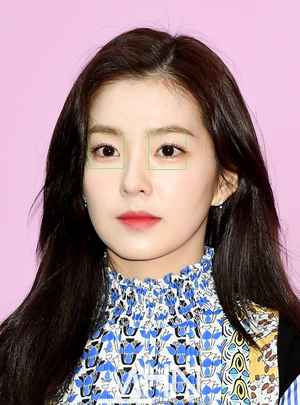

In [22]:
from PIL import Image
img_eye_recog = Image.open('../image/irin_eye.jpg').resize((300,405),Image.ANTIALIAS)
img_eye_recog

# SMOOTHING images

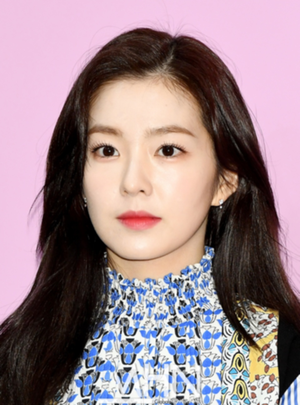

In [23]:
import numpy as np
img = cv2.imread('../image/irin.jpg')
kernel = np.ones((5,5), np.float32)/25
img_smooth = cv2.filter2D(img, -1, kernel)
cv2.imwrite('../image/irin_smooth.jpg',img_smooth)
cv2.imshow('',img_smooth); cv2.waitKey(0)

from PIL import Image
img_smooth = Image.open('../image/irin_smooth.jpg').resize((300,405),Image.ANTIALIAS)
img_smooth

### img_ avg

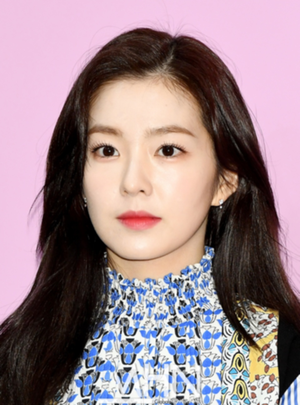

In [24]:
img_avg = cv2.blur(img, (5,5))
cv2.imwrite('../image/irin_avg.jpg',img_avg)
cv2.imshow('', img_avg); cv2.waitKey(0)

from PIL import Image
img_avg= Image.open('../image/irin_smooth.jpg').resize((300,405),Image.ANTIALIAS)
img_avg

### img_ gaussian

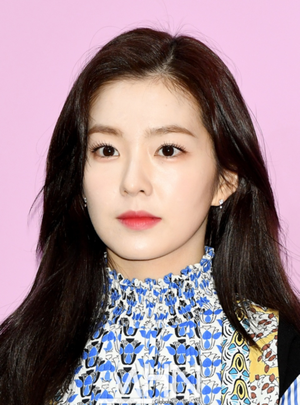

In [25]:
img_gau = cv2.GaussianBlur(img, (5,5),0)
cv2.imwrite('../image/irin_gau.jpg',img_gau)
cv2.imshow('', img_gau); cv2.waitKey(0)

from PIL import Image
img_gau= Image.open('../image/irin_gau.jpg').resize((300,405),Image.ANTIALIAS)
img_gau

### img bilateral Filter

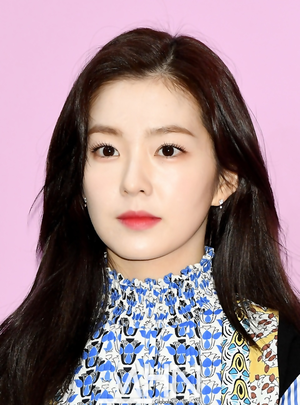

In [26]:
img_bi = cv2.bilateralFilter(img, 9,75,75)
cv2.imwrite('../image/irin_bi.jpg',img_bi)
cv2.imshow('', img_bi); cv2.waitKey(0)

from PIL import Image
img_bi= Image.open('../image/irin_bi.jpg').resize((300,405),Image.ANTIALIAS)
img_bi

# Drawing

### Line

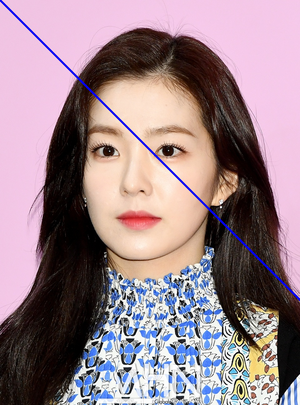

In [27]:
img = cv2.imread('../image/irin.jpg')
line = cv2.line(img, (0,0),(1000,1000), (255,0,0), 5)
cv2.imwrite('../image/irin_line.jpg',line)
cv2.imshow('', line); cv2.waitKey(0)

from PIL import Image
img_line= Image.open('../image/irin_line.jpg').resize((300,405),Image.ANTIALIAS)
img_line

### rectangle

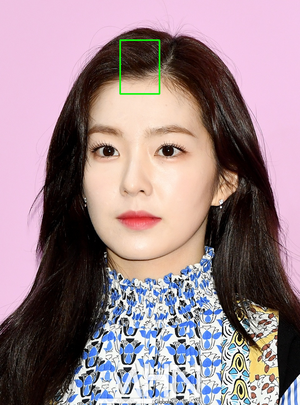

In [28]:
img = cv2.imread('../image/irin.jpg')
rec = cv2.rectangle(img, (384,300),(510,128), (0,255,0), 3)
cv2.imwrite('../image/irin_rec.jpg',rec)
cv2.imshow('', rec); cv2.waitKey(0)

from PIL import Image
img_rec = Image.open('../image/irin_rec.jpg').resize((300,405),Image.ANTIALIAS)
img_rec

### Circle

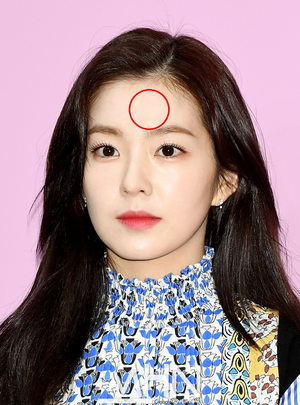

In [29]:
img = cv2.imread('../image/irin.jpg')
cir = cv2.circle(img, (477,350),63,(0,0,255), 3)
cv2.imwrite('../image/irin_cir.jpg',cir)
cv2.imshow('', cir); cv2.waitKey(0)

from PIL import Image
img_cir = Image.open('../image/irin_cir.jpg').resize((300,405),Image.ANTIALIAS)
img_cir

### Ellipse

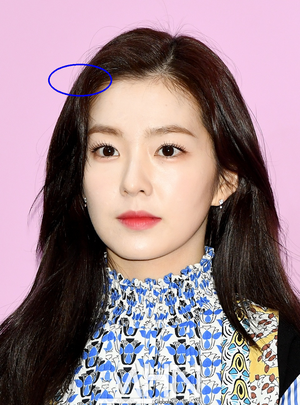

In [30]:
img = cv2.imread('../image/irin.jpg')
ellip = cv2.ellipse(img, (256, 256),(100,50),0,0,360,255, 3)
cv2.imwrite('../image/irin_ellip.jpg',ellip)
cv2.imshow('', ellip); cv2.waitKey(0)

from PIL import Image
img_ellip = Image.open('../image/irin_ellip.jpg').resize((300,405),Image.ANTIALIAS)
img_ellip

### polylines

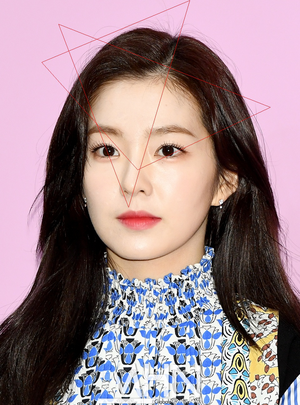

In [31]:
#pts = np.array([[10,5],[20,30],[70,20],[50,10]], np.int32)
#pts = pts.reshape((-1,1,2))
pts = np.random.randint(0,900,(6,1,2))

img = cv2.imread('../image/irin.jpg')
polygon = cv2.polylines(img,[pts], True, (0,0,255))
cv2.imwrite('../image/irin_polygon.jpg',polygon)
cv2.imshow('', polygon); cv2.waitKey(0)

from PIL import Image
img_polygon = Image.open('../image/irin_polygon.jpg').resize((300,405),Image.ANTIALIAS)
img_polygon

### put Text

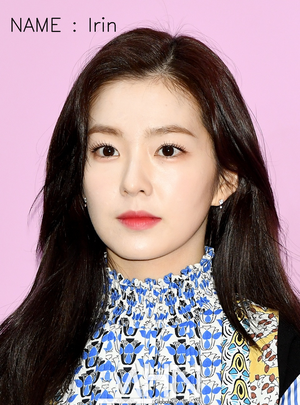

In [32]:
img = cv2.imread('../image/irin.jpg')
text = cv2.putText(img,'NAME : Irin',(30,100), cv2.FONT_HERSHEY_SIMPLEX,2,(0,0,0),2,cv2.LINE_AA)
cv2.imwrite('../image/irin_text.jpg',text)
cv2.imshow('', text); cv2.waitKey(0)

from PIL import Image
img_text = Image.open('../image/irin_text.jpg').resize((300,405),Image.ANTIALIAS)
img_text

# Image Transforms

In [33]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

In [34]:
img = cv2.imread('../image/irin.jpg')
f = np.fft.fft2(img)
f

array([[[ 6.44334000e+05+0.00000000e+00j,
          8.86950000e+03+3.70996623e+04j,
          8.86950000e+03-3.70996623e+04j],
        [-9.93130595e+02+2.67892089e+03j,
          1.29374935e+02+3.29606951e+02j,
         -2.15749596e+01+1.53615470e+02j],
        [ 2.71817563e+02+1.16029308e+03j,
          9.15850293e+01-8.82982966e+01j,
         -5.10865777e+01+1.05366052e+02j],
        ...,
        [ 2.29385769e+02-9.29810092e+02j,
         -1.08444547e+01+6.38389025e+01j,
          9.40282564e+01-5.23682936e+01j],
        [ 2.71817563e+02-1.16029308e+03j,
         -5.10865777e+01-1.05366052e+02j,
          9.15850293e+01+8.82982966e+01j],
        [-9.93130595e+02-2.67892089e+03j,
         -2.15749596e+01-1.53615470e+02j,
          1.29374935e+02-3.29606951e+02j]],

       [[ 6.44402000e+05+0.00000000e+00j,
          8.86850000e+03+3.70442366e+04j,
          8.86850000e+03-3.70442366e+04j],
        [-9.04871408e+02+2.59551217e+03j,
          9.42843798e+01+3.08124409e+02j,
         -2.

In [35]:
fshift = np.fft.fftshift(f)
fshift

array([[[ 1.45000000e+01-5.62916512e+01j,
          6.70000000e+01-3.41060513e-13j,
          1.45000000e+01+5.62916512e+01j],
        [-1.25231490e+00+1.99843917e+01j,
         -1.84061586e+02-3.77841723e+01j,
          1.36533151e+01+1.72986176e+01j],
        [-8.44470878e+00+8.88309193e+00j,
         -2.24271209e+02-4.18689728e+02j,
          2.76102190e+01-4.06496245e+01j],
        ...,
        [ 1.23765605e+01+1.34005771e+01j,
          2.05948005e+02+3.23825896e+02j,
          1.12821688e+01+9.79005910e+00j],
        [ 2.76102190e+01+4.06496245e+01j,
         -2.24271209e+02+4.18689728e+02j,
         -8.44470878e+00-8.88309193e+00j],
        [ 1.36533151e+01-1.72986176e+01j,
         -1.84061586e+02+3.77841723e+01j,
         -1.25231490e+00-1.99843917e+01j]],

       [[ 4.00000000e+00-4.84974226e+01j,
          2.65000000e+02-1.42108547e-13j,
          4.00000000e+00+4.84974226e+01j],
        [-2.13883777e+01-6.74584906e-01j,
         -1.16691664e+02+3.24675743e+01j,
          7.

In [36]:
magnitude_spectrum = np.log(np.abs(fshift))*20
magnitude_spectrum

array([[[ 81.25335087,  84.09385239,  81.25335087],
        [ 59.93822276, 104.71817016,  61.8549887 ],
        [ 50.12117052, 123.26512874,  77.89337029],
        ...,
        [ 58.07405634, 119.00075823,  54.07766165],
        [ 77.89337029, 123.26512874,  50.12117052],
        [ 61.8549887 , 104.71817016,  59.93822276]],

       [[ 77.69800996, 111.59459652,  77.69800996],
        [ 61.26689615,  95.93634023,  39.01595687],
        [ 65.35377226, 118.16087402,  65.34444763],
        ...,
        [ 52.69137823, 105.04489854,  52.17379165],
        [ 65.34444763, 118.16087402,  65.35377226],
        [ 39.01595687,  95.93634023,  61.26689615]],

       [[ 81.53925132, 117.38593826,  81.53925132],
        [ 48.93624055,  93.13468598,  37.2905746 ],
        [ 63.05139531, 105.48792209,  67.37622424],
        ...,
        [ 63.37540161,  95.03507539,  70.6170535 ],
        [ 67.37622424, 105.48792209,  63.05139531],
        [ 37.2905746 ,  93.13468598,  48.93624055]],

       ...,

      

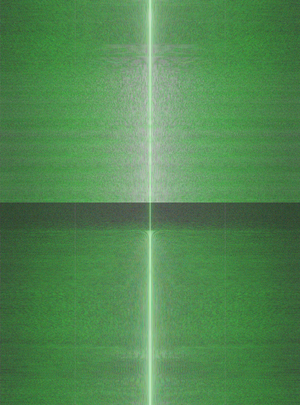

In [37]:
cv2.imwrite('../image/irin_magnitude_spectrum.jpg',magnitude_spectrum)
cv2.imshow('', magnitude_spectrum); cv2.waitKey(0)

from PIL import Image
img_magni = Image.open('../image/irin_magnitude_spectrum.jpg').resize((300,405),
                       Image.ANTIALIAS)
img_magni

# Video Clip

In [38]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import cv2
import os

In [39]:
video = cv2.VideoCapture('../movie/small.mp4')

In [40]:
while (video.isOpened()):
    ret, frame = video.read()
    if ret == True: # return
        cv2.imshow('', frame)
        if cv2.waitKey(0) & 0xFF == ord('q'):
            break
        else:
            break

# KNN in cv2

### 0 ~ 100 --> (25,2) float

### 0 ~ 2 --> (25,1) float

In [41]:
np.random.randint(0,100,(25,2))

array([[28, 55],
       [63, 40],
       [34, 13],
       [25, 54],
       [94, 11],
       [35, 26],
       [75, 76],
       [46, 49],
       [23, 35],
       [92, 30],
       [25,  5],
       [61, 56],
       [63, 59],
       [34, 16],
       [41, 66],
       [70, 24],
       [74, 65],
       [51,  5],
       [74, 58],
       [71, 25],
       [19,  6],
       [35, 51],
       [91,  6],
       [90, 33],
       [99, 77]])

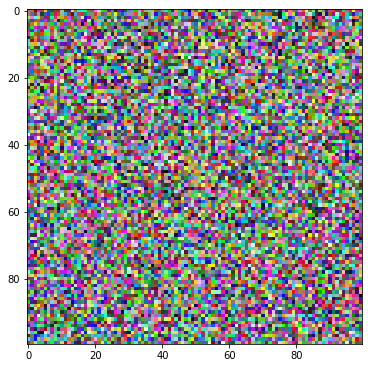

In [42]:
rand_img = np.random.randint(0,255,(100,100,3)) # (가로, 세로, 3=(R,G,B))

plt.figure(figsize=(6,12))
plt.imshow(rand_img)

In [43]:
data = np.random.randint(0,100, (25,2)).astype(np.float32)
data

array([[16., 39.],
       [ 9., 76.],
       [27.,  9.],
       [83., 46.],
       [66., 71.],
       [52., 82.],
       [89., 73.],
       [98., 19.],
       [69.,  0.],
       [15., 60.],
       [21.,  5.],
       [21., 38.],
       [90., 35.],
       [89., 64.],
       [59., 54.],
       [61., 42.],
       [78., 80.],
       [39., 21.],
       [24., 88.],
       [95., 63.],
       [51.,  8.],
       [68., 90.],
       [40.,  0.],
       [33., 69.],
       [83., 26.]], dtype=float32)

In [44]:
label = np.random.randint(0,2,(25,1)).astype(np.float32)
label

array([[1.],
       [1.],
       [1.],
       [0.],
       [1.],
       [0.],
       [1.],
       [1.],
       [1.],
       [1.],
       [0.],
       [1.],
       [0.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [0.],
       [0.],
       [0.],
       [0.],
       [1.],
       [1.]], dtype=float32)

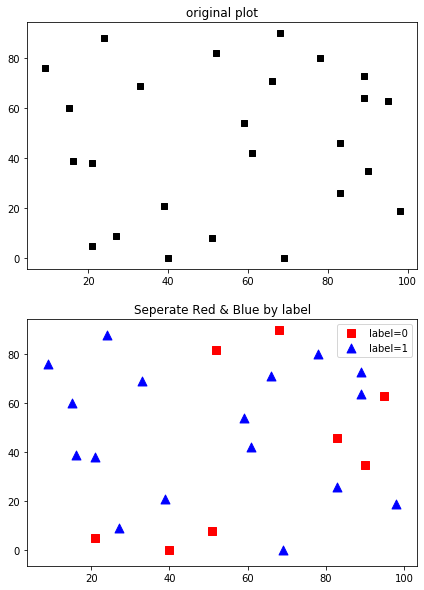

In [45]:
x = data[:,0]
y = data[:,1]

red = data[label.ravel()==0,:]
blue = data[label.ravel()==1,:]

fig, ax = plt.subplots(2,1,figsize=(7,10))

ax[0].set_title('original plot')
ax[0].scatter(x,
              y,
              marker='s',
              color='k')

ax[1].set_title('Seperate Red & Blue by label')
ax[1].scatter(red[:,0],
              red[:,1],
              80,
              marker = 's',
              color='r',
              label='label=0')

ax[1].scatter(blue[:,0],
              blue[:,1],
              80,
              marker = '^',
              color='b',
              label='label=1')
plt.legend(loc='best')

# 테스트 데이터

In [46]:
test = np.random.randint(0,100, (1,2)).astype(np.float32)
test

array([[52., 17.]], dtype=float32)

# KNN 모델

In [47]:
knn = cv2.ml.KNearest_create()

In [48]:
knn.train(data, 
          cv2.ml.ROW_SAMPLE, 
          label)

True

In [49]:
ret, result, neighbor, distance = knn.findNearest(test,3)

print(f'result: {result}\nneighbor: {neighbor}\ndistance: {distance}')

result: [[0.]]
neighbor: [[0. 1. 0.]]
distance: [[ 82. 185. 433.]]


# 테스트 데이터와 함께 그림

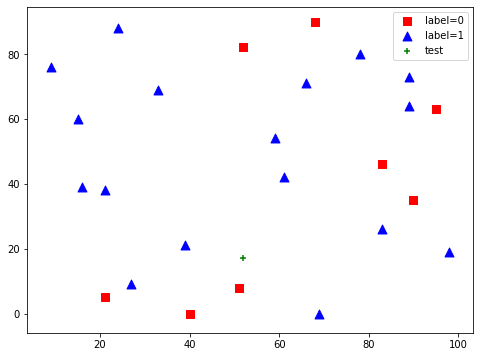

In [50]:
plt.figure(figsize=(8,6))

plt.scatter(red[:,0],
            red[:,1],
            80,
            marker = 's',
            color='r',
            label='label=0')

plt.scatter(blue[:,0],
            blue[:,1],
            80,
            marker = '^',
            color='b',
            label='label=1')

plt.scatter(test[:,0],
            test[:,1],
            marker='+',
            color='g',
            label='test')

plt.legend(loc='best')

# Support Vector Machine

In [51]:
label = label.astype(np.int32)
label

array([[1],
       [1],
       [1],
       [0],
       [1],
       [0],
       [1],
       [1],
       [1],
       [1],
       [0],
       [1],
       [0],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [0],
       [0],
       [0],
       [0],
       [1],
       [1]])

In [52]:
svm = cv2.ml.SVM_create()
svm.setGamma(1)
svm.setC(1)
svm.setKernel(cv2.ml.SVM_LINEAR)
svm.setType(cv2.ml.SVM_C_SVC)
svm.train(data, cv2.ml.ROW_SAMPLE, label)
results, predicted = svm.predict(test)
print("predicted: ", predicted)

predicted:  [[0.]]
